In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import pickle

In [ ]:
import pickle
# with open ('C:/Users/chhav/OneDrive/Desktop/mnist.pkl','rb') as f:
#     #mnist_data = pickle.load(f)
#     print(f.read())

import os
print(os.path.abspath(os.getcwd()))
def unpickle(filename):
    open_first = open(filename, "rb")
    Dic1 = pickle.load(open_first)
    open_again = open(filename, "rb")
    Dic2 = pickle.load(open_again)
    open_first.close()
    open_again.close()
    return Dic1,Dic2

/root/data/pystatml/dl_mnist_pytorch


In [ ]:
%matplotlib inline
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision import models
#
from pathlib import Path
import matplotlib.pyplot as plt
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
from pathlib import Path

WD = os.path.join(Path.home(), "data", "pystatml", "dl_mnist_pytorch")
os.makedirs(WD, exist_ok=True)
os.chdir(WD)
print("Working dir is:", os.getcwd())

os.makedirs("data", exist_ok=True)
os.makedirs("models", exist_ok=True)

def load_mnist(batch_size_train, batch_size_test):
    train_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])), batch_size=batch_size_train, shuffle=True)
    val_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])), batch_size=batch_size_test, shuffle=True)
    return train_loader, val_loader

train_loader, val_loader = load_mnist(64, 10000)
dataloaders = dict(train=train_loader, val=val_loader)

# Info about the dataset
D_in = np.prod(dataloaders["train"].dataset.data.shape[1:])
D_out = len(dataloaders["train"].dataset.targets.unique())

print("Datasets shapes:", {x: dataloaders[x].dataset.data.shape for x in ['train', 'val']})
print("N input features:", D_in, "Output classes:", D_out)

Working dir is: /root/data/pystatml/dl_mnist_pytorch


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!
Datasets shapes: {'train': torch.Size([60000, 28, 28]), 'val': torch.Size([10000, 28, 28])}
N input features: 784 Output classes: 10


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
batch_idx, (example_data, example_targets) = next(enumerate(train_loader))
print("Train batch:", example_data.shape, example_targets.shape)

batch_idx, (example_data, example_targets) = next(enumerate(val_loader))
print("Val batch:", example_data.shape, example_targets.shape)

Train batch: torch.Size([64, 1, 28, 28]) torch.Size([64])
Val batch: torch.Size([10000, 1, 28, 28]) torch.Size([10000])


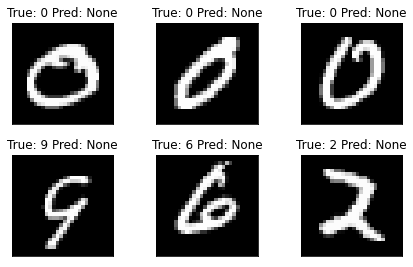

In [ ]:
def show_data_label_prediction(data, y_true, y_pred=None, shape=(2, 3)):
    y_pred = [None] * len(y_true) if y_pred is None else y_pred
    fig = plt.figure()
    for i in range(np.prod(shape)):
        plt.subplot(*shape, i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title("True: {} Pred: {}".format(y_true[i], y_pred[i]))
        plt.xticks([])
        plt.yticks([])
show_data_label_prediction(data=example_data, y_true=example_targets, y_pred=None, shape=(2, 3))

In [ ]:
class Network(object):
      def __init__(self , sizes):
          self. num_layers = len(sizes)
          self.sizes = sizes
          self.biases = [np.random.randn(y, 1) for y in sizes [1:]] 
          self.weights = [np.random.randn(y, x) for x, y in zip(sizes [:-1], sizes [1:])]

      def sigmoid(z):
          return 1.0/(1.0+ np.exp(-z))
      
      def feedforward (self , a):
          """Return the output of the network if "a" is input."""
          for b, w in zip(self.biases , self.weights):
              a = sigmoid(np.dot(w, a)+b)
          return a

           

In [ ]:
import pickle
import gzip
import numpy as np

def load_data ():
    f = gzip.open(’../data/mnist.pkl.gz’, ’rb’)
    training_data , validation_data , test_data = cPickle.load(f)
    f.close ()
    return (training_data , validation_data , test_data )

SyntaxError: ignored

In [ ]:

#### Libraries
# Standard library
import random
# Third -party libraries
import numpy as np


class Network(object):
      def __init__(self , sizes):
          self. num_layers = len(sizes)
          self.sizes = sizes
          self.biases = [np.random.randn(y, 1) for y in sizes [1:]]
          self.weights = [np.random.randn(y, x) for x, y in zip(sizes [:-1], sizes [1:])]
      
      def feedforward (self , a):
          for b, w in zip(self.biases , self.weights):
              a = sigmoid(np.dot(w, a)+b)
          return a
      
      def SGD(self , training_data , epochs , mini_batch_size , eta , test_data =None):
          if test_data :
             n_test = len( test_data )
          n = len( training_data )
          for j in xrange(epochs):
              random.shuffle( training_data )
              mini_batches = [training_data [k:k+ mini_batch_size ] for k in xrange(0, n, mini_batch_size )]
              for mini_batch in mini_batches :
                  self. update_mini_batch (mini_batch , eta)
              if test_data :
                 print("Epoch {0}: {1} / {2}".format(j, self.evaluate ( test_data ), n_test))
              else:
                 print("Epoch {0} complete".format(j))
      
      def update_mini_batch (self , mini_batch , eta):
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]
          for x, y in mini_batch :
              delta_nabla_b , delta_nabla_w = self.backprop(x, y)
              nabla_b = [nb+dnb for nb , dnb in zip(nabla_b , delta_nabla_b )]
              nabla_w = [nw+dnw for nw , dnw in zip(nabla_w , delta_nabla_w )]
          self.weights = [w-( eta/len( mini_batch ))*nw for w, nw in zip(self.weights , nabla_w)]
          self.biases = [b-( eta/len( mini_batch ))*nb for b, nb in zip(self.biases , nabla_b)]
      
      def backprop(self , x, y):
          nabla_b = [np.zeros(b.shape) for b in self.biases]
          nabla_w = [np.zeros(w.shape) for w in self.weights]
      
          # feedforward
          activation = x
          activations = [x] # list to store all the activations , layer by layer
          zs = [] # list to store all the z vectors , layer by layer
          for b, w in zip(self.biases , self.weights):
              z = np.dot(w, activation )+b
              zs.append(z)
              activation = sigmoid(z)
              activations .append( activation )
          
          # backward pass
          delta = self. cost_derivative ( activations [-1], y) * sigmoid_prime (zs[ -1])
          nabla_b [-1] = delta
          nabla_w [-1] = np.dot(delta , activations [ -2]. transpose ())
          for l in xrange(2, self. num_layers ):
              z = zs[-l]
              sp = sigmoid_prime (z)
              delta = np.dot(self.weights[-l+1]. transpose (), delta) * sp
              nabla_b[-l] = delta
              nabla_w[-l] = np.dot(delta , activations [-l -1]. transpose ())
          return (nabla_b , nabla_w)
      
      def evaluate(self , test_data ):
          test_results = [(np.argmax(self. feedforward (x)), y) for (x, y) in test_data ]
          return sum(int(x == y) for (x, y) in test_results )

      def cost_derivative (self , output_activations , y):
          return ( output_activations -y)

      #### Miscellaneous functions
      def sigmoid(z):
          return 1.0/(1.0+ np.exp(-z))

      def sigmoid_prime (z):
          return sigmoid(z)*(1- sigmoid(z))

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical, np_utils
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from sklearn.utils import shuffle